# Метрики качества предсказания

## Confusion matrix (матрица ошибок)

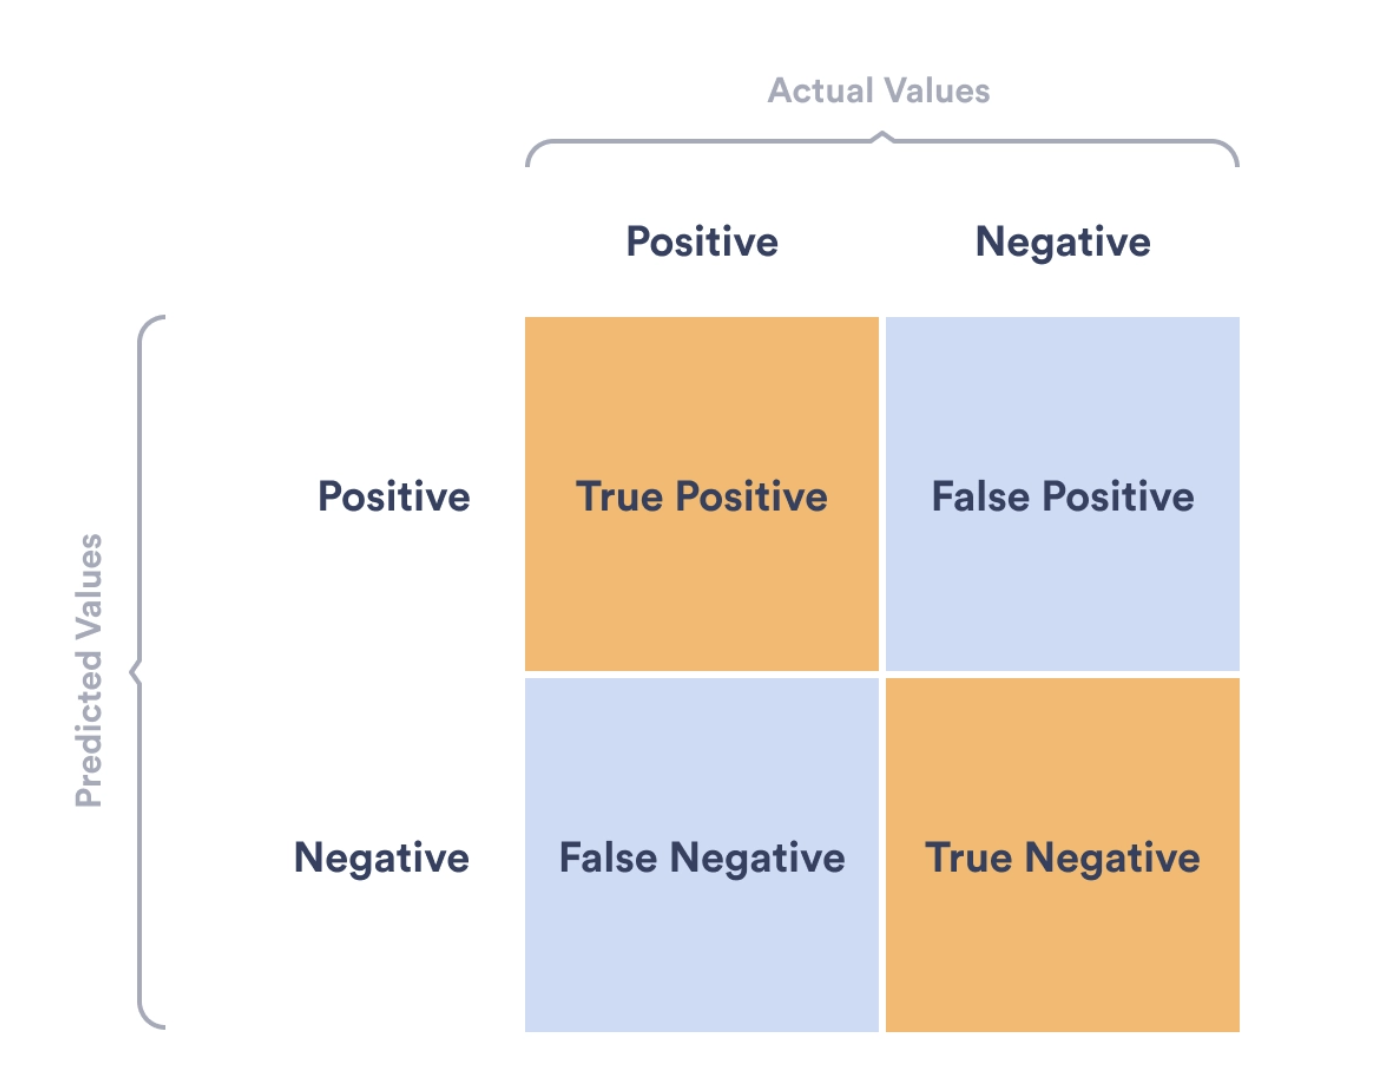

## Accuracy

**Точность** -- это количество правильных предсказаний.

$$Accuracy = \dfrac{TP+TN}{ALL}$$



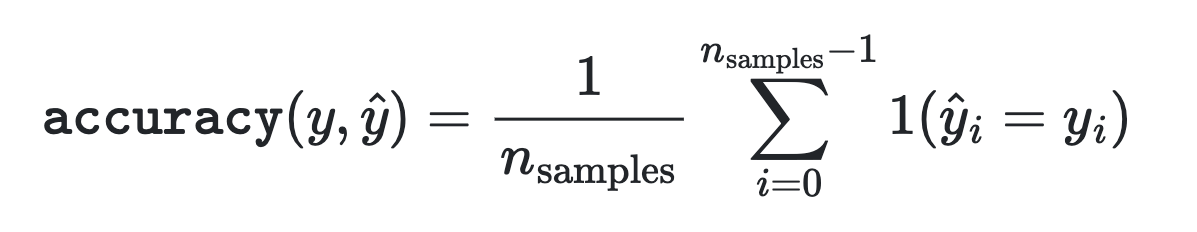

In [48]:
from sklearn.metrics import accuracy_score

y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
print(accuracy_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred, normalize=False))

0.5
2


## Precision

**Точность** -- доля объектов, названных классификатором положительными и при этом действительно являющимися положительными.

$$precision = \dfrac{TP}{TP+FP}$$



In [49]:
from sklearn.metrics import precision_score

y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
precision_score(y_true, y_pred, average=None)

array([0.5, 1. , 1. ])

## Recall

**Полнота** -- это доля истинно положительных результатов.

Насколько хорошо модель умеет выявлять истинные значения среди всех.

$$recall = \dfrac{TP}{TP+FN}$$

In [50]:
from sklearn.metrics import recall_score

# multilabel classification
y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
recall_score(y_true, y_pred, average=None)

array([1. , 1. , 0.5])

## F-мера

-- метрика, учитывающая и точность, и полноту.

$$F_{\beta} = (1+\beta^2)\cdot \dfrac{precision\cdot recall}{(\beta^2\cdot precision)+recall}$$

достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю

Пример для задачи многоклассовой классификации:

In [51]:
from sklearn.metrics import f1_score

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
print(f1_score(y_true, y_pred, average=None))
print(f1_score(y_true, y_pred, average='macro'))
print(f1_score(y_true, y_pred, average='weighted'))
print(f1_score(y_true, y_pred, average='micro'))

[0.8 0.  0. ]
0.26666666666666666
0.26666666666666666
0.3333333333333333


**без параметра** -- метрика считается по каждому классу отдельно

**macro** -- усреднение итоговых метрик, в котором каждому классу присваивается одинаковый вес.

**weighted** -- учитывается дисбаланс классов (больший вес у класса с большим числом объектов)

*вопрос: что делает micro?*

## ROC-AUC кривая
-- это кривая от (0, 0) до (1, 1) в координатах True Positive Rate (TPR) и False Positive Rate (FPR).

Способ оценить модель в целом.

Area Under Curve - Reciever Operating Characteristic curve.

$$TPR = \dfrac{TP}{TP+FN} = recall$$


$$FPR = \dfrac{FP}{FP+TN}$$,
то есть какую долю объектов из negative класса алгоритм предсказал неверно.


In [52]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
print(fpr)
print(tpr)
print(thresholds)

[0.  0.  0.5 0.5 1. ]
[0.  0.5 0.5 1.  1. ]
[1.8  0.8  0.4  0.35 0.1 ]


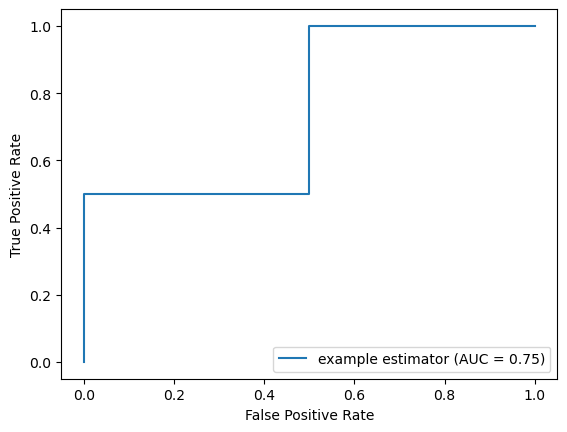

In [53]:
import matplotlib.pyplot as plt

y = np.array([0, 0, 1, 1])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()
plt.show()

**Задание**

1. Сами создайте простой датасет из y_pred и y_true и посчитайте на нем все метрики и постройте ROC-AUC кривую.

2. [Тут](https://www.kaggle.com/code/desalegngeb/heart-disease-predictions/input) Подгрузите себе данные о сердечных заболеваниях людей. Посмотрите на данные, из чего они состоят, какие етсь признаки. Нужная вам колонка -- это колонка target. В ней 1 означает, что у человека есть сердечное заболевание. 0 -- нет. Теперь рандомно сгенерируйте еще один столбец в датасет, который будет служить "предсказанием вашей модели" о наличии заболевания у человека. Посчитайте все метрики и постройте ROC-AUC кривую вашего предсказания.

### Задание 1

In [54]:
y = np.array([0, 0, 0, 1, 1, 1])
pred = np.array([0.1, 0.3, 0.4, 0.35, 0.6, 0.9])
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.33333333 0.33333333 1.        ]
[0.         0.33333333 0.66666667 0.66666667 1.         1.        ]
[1.9  0.9  0.6  0.4  0.35 0.1 ]


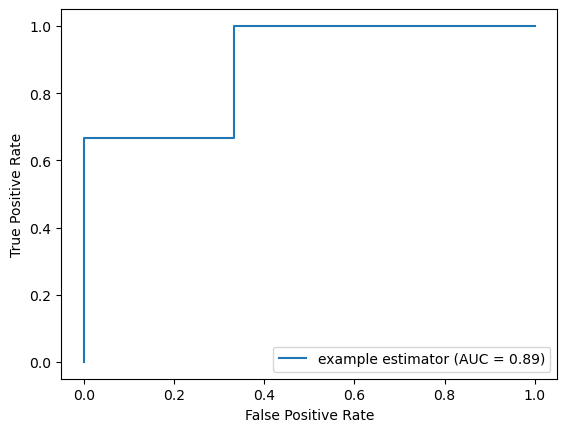

In [55]:
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()
plt.show()

### Задание 2

In [56]:
import pandas as pd


df = pd.DataFrame(pd.read_csv('heart.csv'))
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


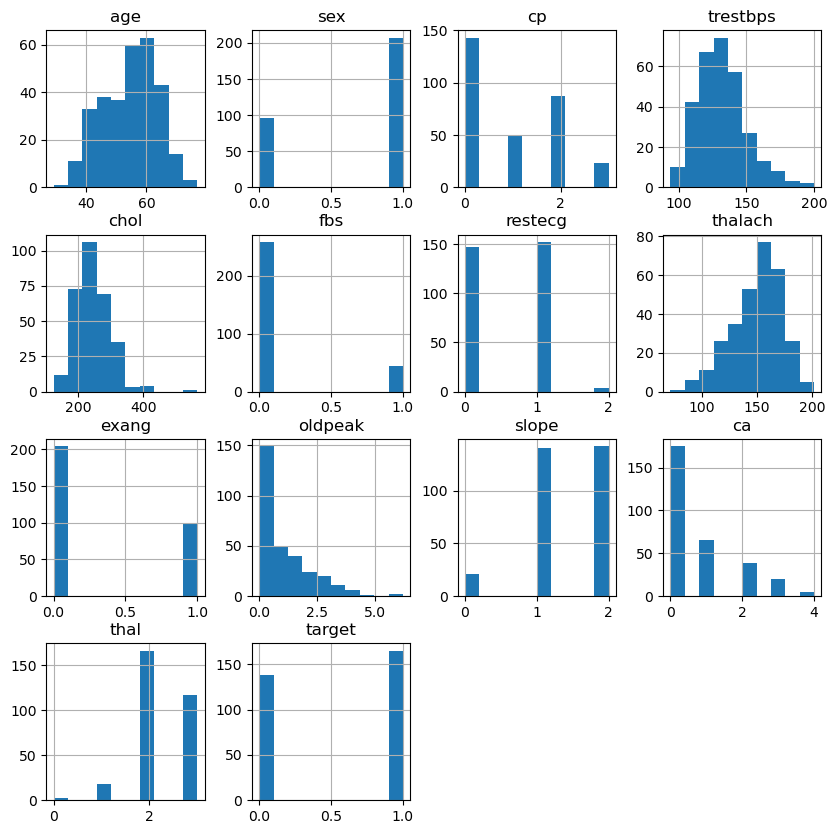

In [57]:
df.hist(figsize=(10, 10));

In [58]:
true = pd.DataFrame(df['target'])
true

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


Random column classifier

In [59]:
pred = pd.DataFrame(np.random.randint(2, size=len(true)))
pred

,0
0,0
1,0
2,1
3,0
4,1
...,...
298,1
299,0
300,1
301,1


In [60]:
print(accuracy_score(true, pred))
print(accuracy_score(true, pred, normalize=False))

0.5412541254125413
164


Random classifier

In [61]:
scores = pd.DataFrame(np.random.rand(len(true)))
scores

,0
0,0.281765
1,0.150716
2,0.831716
3,0.494854
4,0.271532
...,...
298,0.289211
299,0.953336
300,0.742778
301,0.189353


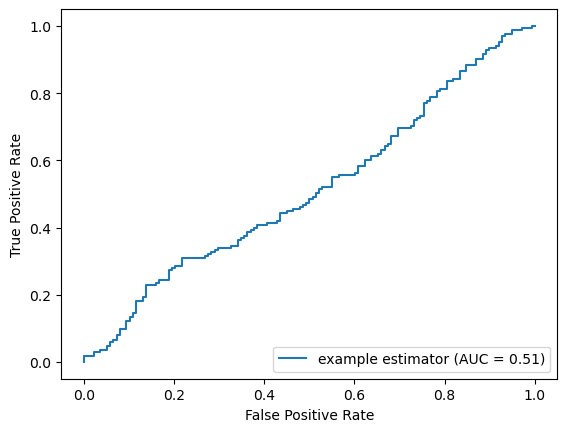

In [62]:
fpr, tpr, thresholds = metrics.roc_curve(true, scores)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()
plt.show()